# Scikit-Learn Introduction



Iris Dataset:

- Features:
    - petal length
    - petal widgth 
    - sepal length 
    - sepal width

- Target Variable: Species
    - Versicolor
    - Virginica
    
 

In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris = datasets.load_iris()
type(iris)


sklearn.utils.Bunch

Bunch similar to a dictionary: key,value pairs

In [5]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [6]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [7]:
iris.data.shape

(150, 4)

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

# Exploratory Data Analysis (EDA)

In [9]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


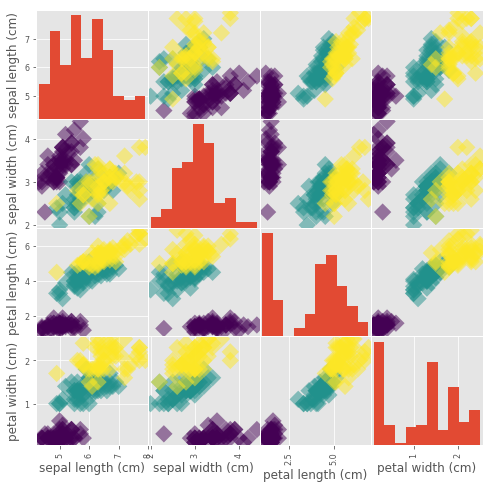

In [10]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8,8], s=150, marker = 'D')
plt.show()

Scikit-Learn does not accept categorical. Need to be encoded as dummy variables.

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Visual EDA

For binary values 0/1, YES/NO use Seaborn's **countplot**

## House of Representatives - Votes

In [12]:
df = pd.read_csv('/Users/jdchipox/Downloads/house-votes-84.csv', header = None)

header = pd.Series(['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious',
       'sattelite', 'aid', 'missile', 'immigration', 'education', 'synfuels','superfund',
       'crime', 'duty_free', 'eaa_rsa'])

df = df.rename(columns = header)
df = df.replace('?', value = 'n')
df = df.replace('n', value = 0)
df = df.replace('y', value = 1)

In [185]:
df.head()

,party,infants,water,budget,physician,salvador,religious,sattelite,aid,missile,immigration,education,synfuels,superfund,crime,duty_free,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party          435 non-null object
infants        435 non-null int64
water          435 non-null int64
budget         435 non-null int64
physician      435 non-null int64
salvador       435 non-null int64
religious      435 non-null int64
sattelite      435 non-null int64
aid            435 non-null int64
missile        435 non-null int64
immigration    435 non-null int64
education      435 non-null int64
synfuels       435 non-null int64
superfund      435 non-null int64
crime          435 non-null int64
duty_free      435 non-null int64
eaa_rsa        435 non-null int64
dtypes: int64(16), object(1)
memory usage: 57.9+ KB


/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


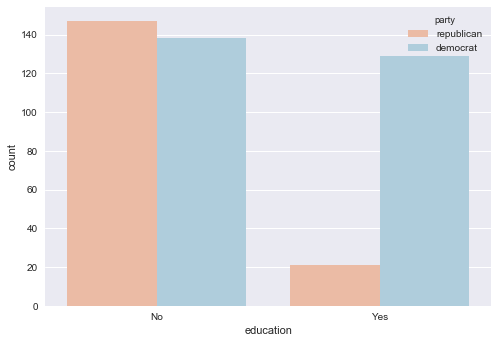

In [25]:
import seaborn as sns

plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# Classification

## k-Nearest Neighbors

Larger k= smoother decision boundary = less complex model. Small k = more complex model = can lead to overfitting

- Basic idea: Predict the label of a data point by:
   - Looking at the 'k' closest labeled data points 
    - Taking a majority vote
 
It creates a set of decision boundaries..

- All machine learning models implemented as Python classes:
    - They implement the alogirthms for learning and predicting
    - Store the information learned from the data
    - Training a model on the data = 'fitting' a model with the fit() method
    - Predict the label of new data: predict()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

- The features as a numpy array and the target as a numpy array. Features: takes continous values

- Requires that there are no missing values in the data.

- Features in an array or df where where each column is a feature and every row an observation.

**The data and the target must have the same number of observations**


In [14]:
iris['data'].shape

(150, 4)

In [15]:
iris['target'].shape

(150,)

- When working in Scikit-Learn you will often extract arrays from dataframes.
- If so, you will need to reshape the dimension of the arrays

In [36]:
df = pd.read_csv('/Users/jdchipox/Downloads/gm.csv')

#Arrays for features and target variables
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


## Predicting on unlabeled data

- Defining column df['party'].values (an np array) as our target y. 
- For x, we drop the that column off from the matrix.

In [19]:
import random 

y = df['party'].values
X = df.drop('party', axis=1).values
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X,y)
#Creates an observation as an array 16(feaatures), 1
colus = [str(i) for i in range(16)]
vals = [[random.random()]for i in range(16)]
lists = zip(colus, vals)
new_dict = dict(lists)
X_new= pd.DataFrame.from_dict(new_dict)

#Predicts using this value
prediction = knn.predict(X_new)

print('Prediction: {}'.format(prediction))

Prediction: ['republican']


Measuring model performance:

$Accuracy = $ fraction of correct prediction.
- Which data should be used to compute accuracy
- Common practice to split data into two sets, a training set and a test set.


## Train_test_split

In [40]:
# Calling kNN 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Calling House Votes
df = pd.read_csv('/Users/jdchipox/Downloads/house-votes-84.csv', header = None)

# Preprocessing
header = pd.Series(['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious',
       'sattelite', 'aid', 'missile', 'immigration', 'education', 'synfuels','superfund',
       'crime', 'duty_free', 'eaa_rsa'])
df = df.rename(columns = header)
df = df.replace('?', value = 'n')
df = df.replace('n', value = 0)
df = df.replace('y', value = 1)

# Defining target and body + split
y = df['party'].values
X = df.drop('party', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=21, stratify=y) #Stratify?


# Initialize kNN and fit on the data
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('kNN Score, accuracy: ',knn.score(X_test, y_test))
print('Test set predictions:\n {}'.format(y_pred))

kNN Score, accuracy:  0.954198473282
Test set predictions:
 ['democrat' 'republican' 'republican' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'republican' 'republican' 'republican'
 'republican' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'republican' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'democrat' 'republican' 'republican'
 'democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'democrat' 'republican' 'democrat'
 'democrat' 'democrat' 'republican' 'republican' 'republican' 'democrat'
 'democ

# Regression

For continous data. 

Boston housing data

In [27]:
boston = pd.read_csv('/Users/jdchipox/Downloads/boston.csv')
print(boston.head())

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [164]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### LinearRegression()

- For two variables

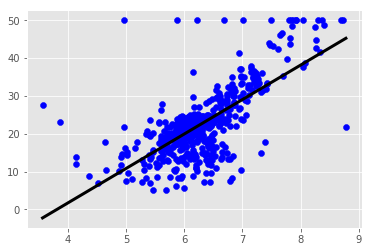

In [37]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

boston = pd.read_csv('/Users/jdchipox/Downloads/boston.csv')

# Defining target and body. Reshaping target array two the correct dimension
X = boston.drop('MEDV', axis=1).values #removes the target feature
y = boston['MEDV'].values # the target feature

y = y.reshape(-1,1)
X_rooms = X[:,5] # ACCESING COLUMN RM!
X_rooms = X_rooms.reshape(-1,1)



# Fitting model
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

# Creating space to predict to.
# Equally spaced values in an array from min to max in the correct dimension.
prediction_space = np.linspace(min(X_rooms), 
                               max(X_rooms)).reshape(-1,1)

# Defining the two dimensions to plot.
# The y-axis is the prediction of the regressor to the prediction space
plt.scatter(X_rooms, y, color = 'blue')
plt.plot(prediction_space, reg.predict(prediction_space), 
        color = 'black', linewidth = 3)
plt.show()

## Gapminder Data

When working with Scikit Learn you will often need to reshape the arrays it for this.

In [35]:
df = pd.read_csv('/Users/jdchipox/Downloads/gm.csv')

#Arrays for features and target variables
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [18]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


## Correlation Matrix 

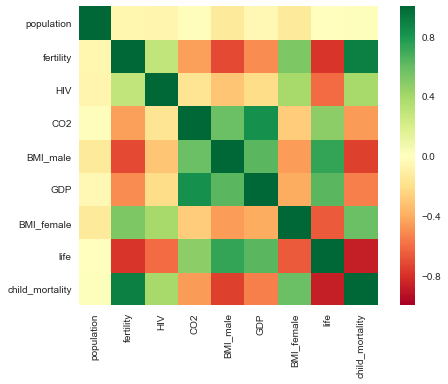

In [19]:
import seaborn as sns 
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

The basics of linear regresion: fit a line through the data.

$y = mx + b$

Where:
- $y = target$
- $x = single\ feature$
- $a, b = parameters\ of\ model$


How do we choose a and b?
- **Define a loss function.**
- Choose a, b that minimize the squared of the loss function (RMSE).

- The loss function alone is not sufficient: large positive residue will cancel out a **NEGATIVE** residue. 

 - If the model was $y = a_1x_1 + a_2x_2 + b$, we must specify three variables.
 - One coefficient for each feature.
 
SckiKit Learning => Pass two arrays: Features and targets

Value of R^2:  0.619244216774


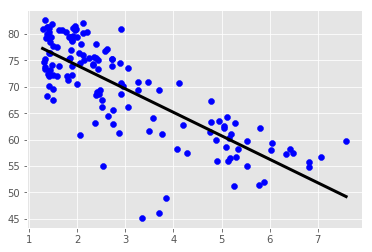

In [41]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Import
df = pd.read_csv('/Users/jdchipox/Downloads/gm.csv')

#Two arrays as feature and target
y = df['life'].values
X = df['fertility'].values
y = y.reshape(-1,1)
X = X.reshape(-1,1)
X_fertility = X


# Initialize the linear regressor
reg = LinearRegression()

# Create the prediction space and fit the model to the data
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)
reg.fit(X_fertility, y)

# y_pred: Prediction over the prediction_space
y_pred = reg.predict(prediction_space)

# Print Rsquared
print("Value of R^2: ", reg.score(X_fertility, y))

# Plot regression line
plt.scatter(X, y, color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()


## Regularization

If your data has a high-dimensional space, with large coefficient it gets easy to predict nearly everything (can lead to overfitting). 

- Regularization to **penalize for large coefficients.**

The loss function is defined as:
    
    LOSS = OLS + sum(f(coefficients))

## Lasso Regression

One of the most important for displaying results to non-technical people. 
- It selects important features from the data set.

[-0.         -0.         -0.          0.          0.          0.         -0.
 -0.07087587]


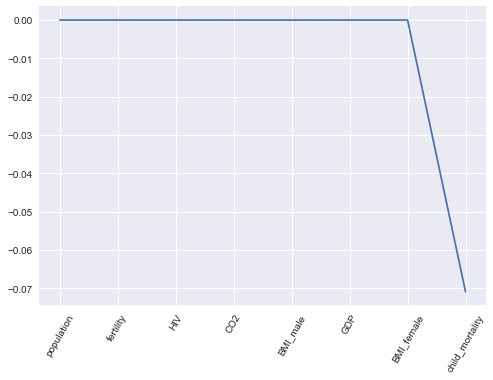

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

df = pd.read_csv('/Users/jdchipox/Downloads/gm.csv')

# Array as target, matrix as features
X = df
y = X['life'].values
X = X.drop('life', axis=1)
X = X.drop('Region', axis=1)
df_columns = X.columns
X = X.values

# Instantiate a lasso regressor: lasso. # Alpha hyperparameter
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.show()


## Ridge Regression
### cross_val_score
Lasso is great for feature selection but when building regression models:
- But **Ridge** should be the *first* choice.

Here we visualize how the performance metric changes as we change the hyperparameter that we selected.


In [45]:
# Visualizing Score Metric. Receives
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5') # Computes the maximum and throws the line
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

Don't worry about the graph above. It just to see how $R^2$ varies with different alphas

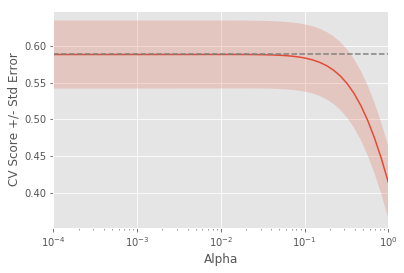

In [44]:
# Import necessary modules
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores !!! HERE IS THE IMPORTANT THING!
    ridge_cv_scores = cross_val_score(ridge, X,y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


In [35]:
%timeit cross_val_score(ridge, X, y, cv = 10)

100 loops, best of 3: 13.2 ms per loop


# Classification

### Class imbalance 


Accuracy is not always a useful metric. Consider a classification problem:
- Spam classification:
    - 99% of emails are real, 1% are spam
    - Could build a classifier that predicts ALL emails as real
    - 99% accurate sounds great, but is horrible at classifying spam.

Class imbalance: the class of spam contains way less than the class of normal emails.



Diagnosing classification predictions
- Given binary a classification, we can create a 2x2 matrix that summarizes predictive performance called
## Confusion Matrix 



- **Sensitivity, recall or true positive rate**:
> $\dfrac{tp}{tp + fn}$
- Specificity, true negative rate:
> $\dfrac{tn}{tn+fp}$
- Precision:
> $\dfrac{tp}{tp+fp}$
- **Fall-out or false positive rate**:
> $\dfrac{fp}{fp+tn}$

_ _ _ _ 
- Miss rate:
> $\dfrac{fn}{fn+tp}$
- Negative predictive value:
> $\dfrac{tn}{tn+fn}$
_ _ _ 



                          Predicted:  Predicted:
                          Spam Email  Real Email
                            
      Actual: Spam Email  True Pos (tp) False Neg (fn)
      Actual: Real Email  False Pos (fp) True Nega (tn)

Accuracy is the sum of the diagonal divided by the total sum of the matrix. **Predicted spam is the positive class**.

- You can retrieve accuracy from the confusion matrix. It is given by:

$Accuracy = \dfrac{tP + tN}{tp + tn + fp + fn}$

You can also compute other metrics from the confusion matrix:

- Correctly labeled spam emails, divided by total number of emails as spam. Precision: $\dfrac{tP}{tP + fP}$. 


- True positives divided by number of true positives and false negatives. (sensitivity, hit rate or **Recall**): $\dfrac{tP}{tP + fN}$


- Two times the product of the precision of recall divied by the sum the precision + recall. F1 score: $2*\dfrac{precision*recall}{precission + recall}$

**High precision: Low number of false positives**

**High recall: Predicted most spam emails correctly, low number of false negatives (incorrectly rejected).**


####  Confusion Matrix and Classification Report for House Data

In [55]:
df.head()

,party,infants,water,budget,physician,salvador,religious,sattelite,aid,missile,immigration,education,synfuels,superfund,crime,duty_free,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [57]:
# Import necessary modules
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

# Import
df = pd.read_csv('/Users/jdchipox/Downloads/house-votes-84.csv', header = None)

# Preprocessing
header = pd.Series(['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious',
       'sattelite', 'aid', 'missile', 'immigration', 'education', 'synfuels','superfund',
       'crime', 'duty_free', 'eaa_rsa'])

df = df.rename(columns = header)
df = df.replace('?', value = 'n')
df = df.replace('n', value = 0)
df = df.replace('y', value = 1)
y = df['party'].values
X = df.drop('party', axis=1).values

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size=0.4)

# Instantiate kNN
knn = KNeighborsClassifier(n_neighbors=6)

# Fitting model to training data
knn.fit(X_train,y_train)

# Predicting labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Confusion Matrix
# Classification Report
print('Printing confusion matrix: ')
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Printing confusion matrix: 
[[108   7]
 [  6  53]]

             precision    recall  f1-score   support

   democrat       0.95      0.94      0.94       115
 republican       0.88      0.90      0.89        59

avg / total       0.93      0.93      0.93       174



For all metrics in Scikit Learn: like confusion_matrix().
- The first argument is always the true label, the prediction is always the second argument.**
- User needs to input `y_test` and `y_pred`

#### Diabetes Data 

In [53]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


####  Confusion Matrix and Classification Report for Diabetes Data

Classification reports and confusions matrices are great methods for evaluating a model performance. 



In [58]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('/Users/jdchipox/Downloads/diabetes.csv')
df.head()
y = df['diabetes'].values
X = df.drop('diabetes', axis=1).values

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size=0.4)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[176  30]
 [ 56  46]]
             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308



## Logistic Regression

For binary classificaiton: two possible labels for target variable.

- Logistic regression **outputs probabilites.**
- Depending on the *regression treshold*, $0.5$ by default


   - if the probability $p$ is greater than $0.5$: data is labeled '$1$'
   - If the probability $p$ is less than $0.5$: data is labeled '$0$'
   
**Produces a linear decision boundary**, follows the same formula as linear regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('/Users/jdchipox/Downloads/diabetes.csv')
df.head()
y = df['diabetes'].values
X = df.drop('diabetes', axis=1).values



logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state =42)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test) # COULD BE USED FOR KNN

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       206
          1       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



## The ROC curve or Probability Detection

What happens when we vary the probability threshold?

- The probability treshold is not only for logisitic regression but also knn and others algorithms.

_ _ _ _ 
What happens with the True positive and False positive rate.
- When $P = 0$ model predicts $1$ for all the data, every prediction is positive. **There is no false negative or true negative**
  >$tpr = fpr = 1$.
- When P = 1 model predicts 0 for all the data, every prediction is negative. **There is no true positive or false positive**
> $tpr = fpr = 0$

If we vary the treshold between this two extremes: we get a different set of True Positive and False Positive rates. 
- This  is called Receiver Operating Characteristic Curve or ROC.
- You want the ROC curve to be high TPR and low FPR that is where optimum lies. Always a nice way to see what happens when we vary the treshold.


- __Most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class.__



[[174  32]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       206
          1       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



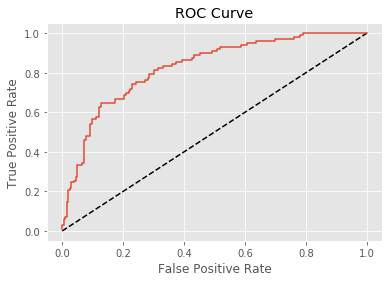

In [76]:
# Import the necessary modules
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

#Import
df = pd.read_csv('/Users/jdchipox/Downloads/diabetes.csv')
# Select target and body
y = df['diabetes'].values
X = df.drop('diabetes', axis=1).values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)
# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


**ROC Curve provides a way to visually evualate the models.**
- One can see an optimum around fpr = 0.2

We used the predictive probabilites of the model, assigning a value of 1 to the observation in question.

- To compute the ROC we don't only want the prediction: BUT **we want the probability that our logreg model** outputs before using a treshold to predict the label.

#### logreg.predict_proba()

logreg.predict_proba(X_test)[:,1] returns an array with two columns: 
- Each column contains the probabilites for the respective target values. 
- We chose the second column the one with index one=> **Which is the probability of the predicted labels being 1.** 

## Precision-Recall Curve

The y-axis (True positive rate) is also known as "recall". 
- In addition to the ROC curve, the **precision-recall** is generated for plotting precision and recall for different tresholds.

$Precision = \dfrac{TP}{TP + FP}$

$Recall = \dfrac{TP}{TP + FN}$


- A recall of 1 corresponds to a classifier with a low treshold in which all subjects are classifed correctly, at the expense of many misclassification of those who did not have diabetes.

- Precision is undefined for a classifier which makes no positive predictions, that is, **clasifies everyone as not having diabetes**

- When the treshold is very close to 1, precision is also 1, because the classifier is absolutely 


### Area under the ROC curve

Given an ROC curve, can we extract a metric of intererest?

- The larger area under the ROC curve = better model. If we had a model with a TPR of 1 and FPR of 0=> area of 1! greatest possible.


In [84]:
from sklearn.metrics import roc_auc_score
logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.4,
                                                   random_state=42)
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)

0.8269084332762231

### AUC using Cross-Validation

**NOTE**: Even with Cross Validation its common practice to split beforehand into train and test sets!

In [85]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5,
                          scoring = 'roc_auc')
print(cv_scores)

[ 0.79888889  0.80777778  0.81944444  0.86622642  0.85037736]


In [86]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8269084332762231
AUC scores computed using 5-fold cross-validation: [ 0.79888889  0.80777778  0.81944444  0.86622642  0.85037736]


_ _ _ _ _
### Hyperparameter Tuning

- Linear regression: choosing parameters
- Ridge/lasso regression: choose alpha
- kNN: choose n_neighbors
- ...

These parameters are called **hyperparameters** cannot be learned by fitting the model.

##### Choosing the correct hyperparameter

- Try a bunch of different hyperparameter values
- Fit all of them separately
- See how well each performs
- Choose the best performing one

**It is essential to use cross-validation** Using train test splits alone would risk overfitting the hyperparameter to the test set.

____
**NOTE** Even after tunining our hyperparameter using cross-validation, we'll want to have already split off a test set in order to report how well our model can be expected to perform on a dataset that is has never seen before.

## Grid search cross-validation

- We choose a grid of possible values we want to try for the hyperparameter(s).

- If we have two hyperparameters. One of them rows, the other columns and **look for the combination that performed best**

In scikit-learn using the class `GridSearchCV`. 

There is also `RandomizedSearchCV` similar but is able to jump around the grid.

- Specify the hyperparameter as a dictionary, in which the keys are the hyperparameter names and the values are lists containing the values we wish to tune the hyperparameters over.

**If we specify multiple parameters, all possible combinations will be tried**

In [79]:
from sklearn.model_selection import GridSearchCV

# Dictionary in this form, with the argument name as key.
# And a array of hyperparameter values as value.
param_grid = {'n_neighbors': np.arange(1,50)}

# Initalize Classifier
knn = KNeighborsClassifier()
# Perform grid search CV and find best (set) of hyperparameters
knn_cv = GridSearchCV(knn, param_grid, cv=5)
# Fit the best model
knn_cv.fit(X,y)
# See the best performing hyperparamter values
knn_cv.best_params_

{'n_neighbors': 14}

In [80]:
knn_cv.best_score_

0.7578125

In [81]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1389495.494373136}
Best score is 0.7721354166666666


- It looks like 'C' of 1389495.5 results in the best performance!

- GridSearchCV can be very expensive, specially if you dealing with **multiple hyperparameters**. A solution is `RandomizedSearchCV` in  which NOT all hyperparamters are tried out.

**Instead, a fixed number of hyperparameters is sampled from specified probability distributions**

### DecisionTreeClassifier and RandomizedSearchGrid


- `RandomizedSearchGrid()` to try out several hyperparameter values

In [87]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 6}
Best score is 0.7434895833333334


You'll see a lot of decision trees and `RandomizedSearchCV` as you continue your learning journey. 

**NOTE** `RandomizedSearchGrid` will never outperform `GridSearchCV` it just saves time!

# Hold-out set reasoning

- How well can the model perform on never before seen data? 
- However if I have used all of my data for cross validation => NOT IDEAL. Not a picture of how it will perform with not seen data.
- **Split data into training and hold-out-set at the beginning**

- Perform grid search cross-validation on training set
- Choose best hyperparamters and **evaluate on hold-out set**

## Hold-out set practice in Classification

- In addition to *C*, logistic regression has a 'penalty' which specifies wether to use 'l1' or 'l2' regularization. 

In [88]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


## Hold-out set practice in Regression

Lasso used L1 penalty to regularize, while ridge used the L2 penalty. here is another type of regularized expression known as **elastic net regularization**: 
- A linear combination of the $L1$ and $L2$ penalties $a * L1 + b * L2$

- In scikit-learn, this is represented as `l1_ratio` parameter. An `l1_ratio` of 1 corresponds to an $L1$ penalty. Anything lower is a combination of $L1$ and $L2$

In [119]:
df = pd.read_csv('/Users/jdchipox/Downloads/gm.csv')

#Arrays for features and target variables
y = df['life'].values
X = df.drop(['life', 'Region'], axis=1).values

# Reshape X and y
#y = y.reshape(-1,1)

In [124]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of ite

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460284
Tuned ElasticNet MSE: 10.057914133398437


**NOTE** Increasing CV to 10! completely changes the l1 ratio. But CV of 5 shows l1_ratio of 0.2

From Quora:

**The choice of number of folds must allow the size of each validation partition to be large enough to provide a fair estimate of the model’s performance** on it and at the same time K shouldn’t be be too small, say 2, such that we don’t have enough trained models to evaluate.

Now it's time to learn about preprocessing techniques and how to piece together all the different states of the machine learning process into a **PIPELINE**.

# Pipelines
## Preprocessing and Fitting
### Dealing with categorial features


- Scikit-learn will not accept categorical features by default
- Need to encode categorical features numerically
- Convert to 'dummy variables' one for each category
- 0: observation was not a category
- 1: observation was in the category

For 3 variables, 2 dummy variables are needed. If we use 3, we are duplicating information. 

- scikit-learn: `OneHotEncoder()`
- pandas: `get_dummies()`

Then drop one of the columns!

### Handling missing data

- Missing values can be encoded in an number of different ways. Even if not apparent from df.info(), 0, questionmarks, or negative ones.

z.B let's say 0 is the values. (missing). We can use replace.

`df.insulin.replace(0, np.nan, inplace=True)`
...

But how to we deal with **mising data**?

1. Dropping missing data

- `df=df.dropna()` : if you loose a lot of your data is not acceptable.
- Imputing missing data, making an educated guess. Many ways, among them: compute the mean of the non missing entries.

`Imputer(missing_values = missing_values, strategy='mean', axis=0 or 1` 

- axis = 0 we will impute along columns
- axis = 1 we will impute along rows

**Imputers are known as transformers**

In [125]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values= 'NaN', 
             strategy='mean', axis=0)
#axis =0 means we will impute using columns

imp.fit(X)

x = imp.transform(X)

Is there a way to this and train our model at once?

- There sure is! We can use the `pipeline` object.

**In a pipeline, each step but the last must be a transformer, the last must be an estimator (classifier, regressor or another transformer).**

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import

# Define body and label

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=42)

# Imputer replaces NaN values by the mean.
# We impute along columns axis = 0. 
imp = Imputer(missing_values='NaN', 
              strategy='mean',
              axis=0)

logreg = LinearRegression()

# Construct pipeline object, each a two tuple
steps=[('imputation', imp), 
       ('logistic_regression', logreg)]

pipeline= Pipeline(steps)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

pipeline.score(X_test, y_test)

NameError: name 'X' is not defined

## For the voting data set

Here we loose a lot of information droping the columns.

Here we first transform all '?' to NaN and drop them!

In [100]:
df = pd.read_csv('/Users/jdchipox/Downloads/house-votes-84.csv', header = None)

header = pd.Series(['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious',
       'sattelite', 'aid', 'missile', 'immigration', 'education', 'synfuels','superfund',
       'crime', 'duty_free', 'eaa_rsa'])

df.columns = header

y = df['party'].values
X = df.drop('party', axis=1).values

# Convert '?' to NaN
df[df == '?'] = np.nan



# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party            0
infants         12
water           48
budget          11
physician       11
salvador        15
religious       11
sattelite       14
aid             15
missile         22
immigration      7
education       21
synfuels        31
superfund       25
crime           17
duty_free       28
eaa_rsa        104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


### Imputing a missing data in a ML Pipeline I

What makes **pipelines so incredibly useful is th simple niterface that they provide. You can use `fit()` and `.predict()` methods on pipelines aswell!**

- Support Vector Machines is another type of classifier, works exactly the same as knn, lm and decision tree.

In [107]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


# Import and Create Columns
df = pd.read_csv('/Users/jdchipox/Downloads/house-votes-84.csv', header = None)
header = pd.Series(['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious',
       'sattelite', 'aid', 'missile', 'immigration', 'education', 'synfuels','superfund',
       'crime', 'duty_free', 'eaa_rsa'])
df.columns = header


# Convert '?' to NaN
df[df == '?'] = np.nan

# DUMMIFY CATEGORICAL VARIABLE
# This changes the name of the column. Since we dropped one column
# Instaed of 'party' it becomes 'party_republican'
# 1 represents from republican. 0 represents from democrats.
df = pd.get_dummies(df, drop_first=True)


# Define body and target
y = df['party_republican'].values
# y = y.reshape(-1,1)
X = df.drop('party_republican', axis=1).values



# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82  3]
 [ 1 45]]
             precision    recall  f1-score   support

          0       0.99      0.96      0.98        85
          1       0.94      0.98      0.96        46

avg / total       0.97      0.97      0.97       131



### Centering and Scaling

Another preprocessing step.
Why scale the data? 
- The range of different attributes varies wildly. 

- Many models use some form of distance. Features on large scales can influence the model

- We want feautures in a similar scale: 


1. 'Centering and Scaling' substract the mean and divide by the standard deviation. All features centered around 0 and have variance and std of one.
2. We can also substract the minimum and divide by the range, so that the minimum is 0 and the maximum is one.
3. We can also normalize so that the data ranges between -1 to 1.

In [ ]:
from sklearn.preprocessing import scale

X_scaled = scale(X) # RETURNS STANDARDIZED DATA
np.mean(X), np.std(X)

You can use scaling in a pipeline.

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Import and Create Columns
df = pd.read_csv('/Users/jdchipox/Downloads/house-votes-84.csv', header = None)
header = pd.Series(['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious',
       'sattelite', 'aid', 'missile', 'immigration', 'education', 'synfuels','superfund',
       'crime', 'duty_free', 'eaa_rsa'])
df.columns = header


# Convert '?' to NaN
df[df == '?'] = np.nan

# DUMMIFY CATEGORICAL VARIABLE
# This changes the name of the column. Since we dropped one column
# Instaed of 'party' it becomes 'party_republican'
# 1 represents from republican. 0 represents from democrats.
df = pd.get_dummies(df, drop_first=True)


# Define body and target
y = df['party_republican'].values
# y = y.reshape(-1,1)
X = df.drop('party_republican', axis=1).values




steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn.scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

#SCALING DID INPROVE!
print('kNN with scaled features: ',accuracy_score(y_test, y_pred))

knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

print('kNN with unscaled features: ', knn_unscaled.score(X_test, y_test))

kNN with scaled features:  0.965517241379
kNN with unscaled features:  0.942528735632


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## CV and Scaling in a pipeline

In [141]:
df = pd.read_csv('/Users/jdchipox/Downloads/white-wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [148]:
# Define body and target
y = df['quality'].values
# y = y.reshape(-1,1)
X = df.drop('quality', axis=1).values




# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=5)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.6081632653061224
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.24      0.39      0.30        28
          5       0.61      0.62      0.61       289
          6       0.66      0.66      0.66       447
          7       0.62      0.54      0.58       177
          8       0.47      0.42      0.44        38

avg / total       0.61      0.61      0.61       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1}


In [2]:
X

NameError: name 'X' is not defined

## We need our data stored neatly to check for future things.